In [1]:
import numpy as np
import cupy as cp
import cusignal
import numba
from matplotlib import pyplot as plt

## Standard Workflow

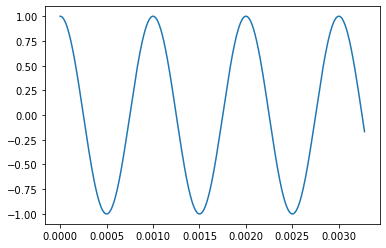

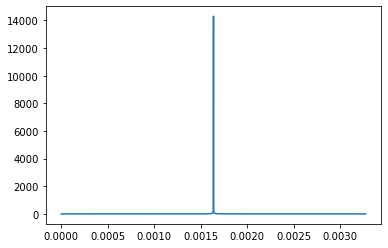

In [2]:
fs = 10e6
N = 2**15

t = np.linspace(0.0, N*(1.0/fs), N)
sig = np.cos(1000*2*np.pi*t)

# Plot sig
plt.plot(t, sig)
plt.show()

fft_sig = np.abs(np.fft.fftshift(np.fft.fft(sig)))

plt.plot(t, fft_sig)
plt.show()

### Timing

2.67 ms ± 21.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


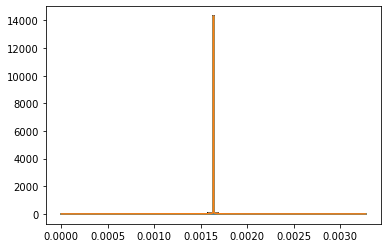

In [3]:
%%timeit
plt.plot(t, sig)
plt.plot(t, fft_sig)

## GPU Workflow

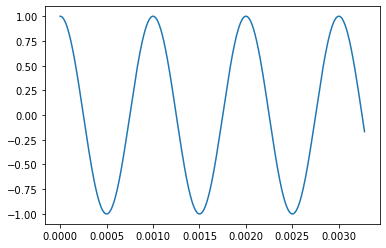

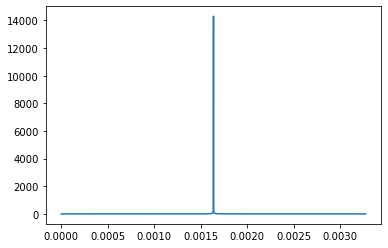

In [4]:
fs = 10e6
N = 2**15

t = cp.linspace(0.0, N*(1.0/fs), N)
sig = cp.cos(1000*2*cp.pi*t)

# Plot sig
plt.plot(cp.asnumpy(t), cp.asnumpy(sig))
plt.show()

fft_sig = cp.abs(cp.fft.fftshift(cp.fft.fft(sig)))

plt.plot(cp.asnumpy(t), cp.asnumpy(fft_sig))
plt.show()

### Timing

3.64 ms ± 16 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


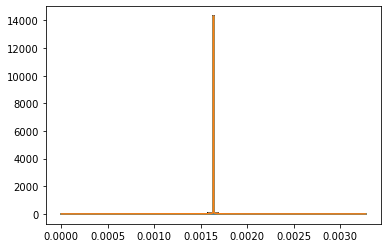

In [5]:
%%timeit
plt.plot(cp.asnumpy(t), cp.asnumpy(sig))
plt.plot(cp.asnumpy(t), cp.asnumpy(fft_sig))

## GPU - Mapped Memory

In [6]:
t_smem = cusignal.get_shared_mem(N, dtype=np.float64)
sig_smem = cusignal.get_shared_mem(N, dtype=cp.float64)
fft_sig_smem = cusignal.get_shared_mem(N, dtype=cp.float64)

In [7]:
t_smem[:] = numba.cuda.as_cuda_array(cp.linspace(0.0, N*(1.0/fs), N))
sig_smem[:] = numba.cuda.as_cuda_array(cp.cos(1000*2*cp.pi*cp.asarray(t_smem)))
fft_sig_smem[:] = numba.cuda.as_cuda_array(cp.abs(cp.fft.fftshift(cp.fft.fft(cp.asarray(sig_smem)))))

### Timing

2.36 ms ± 98 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


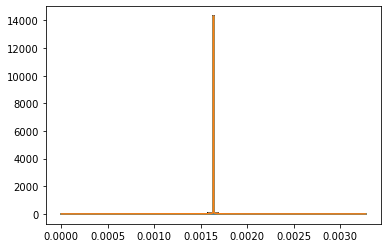

In [8]:
%%timeit
plt.plot(t_smem, sig_smem)
plt.plot(t_smem, fft_sig_smem)